## Sarvjeet Singh 
## Email: sarvjeet2606@gmail.com


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("Fraud.csv")

### Data Expolration and Pre-processing

In [3]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [4]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [5]:
df.drop_duplicates()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [6]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [7]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [8]:
df["type"].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [9]:
temp = df[df["type"]=="CASH_IN"]

In [10]:
temp["isFraud"].value_counts()

0    1399284
Name: isFraud, dtype: int64

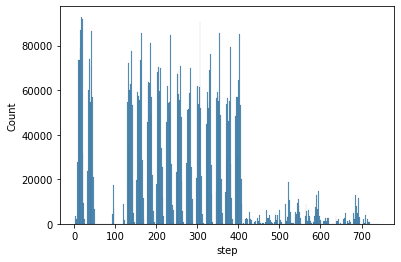

In [9]:
sns.histplot(df["step"])
plt.show()

### Encoding Type column

In [11]:
'''CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT'''

def type(s):
    if s=="CASH_OUT":
        return 0
    elif s=="PAYMENT":
        return 1
    elif s=="CASH_IN":
        return 2
    elif s=="TRANSFER":
        return 3
    elif s=="DEBIT":
        return 4


In [12]:
df["type"]=df.type.apply(type)

In [13]:
df["type"].value_counts()

0    2237500
1    2151495
2    1399284
3     532909
4      41432
Name: type, dtype: int64

In [ ]:
sns.distplot(df["isFraud"])

c:\users\sarvjeet\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


In [ ]:
df.corr()

In [ ]:
df["isFraud"].value_counts()

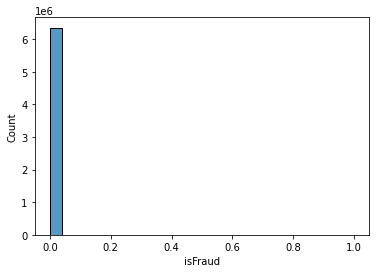

In [15]:
sns.histplot(df["isFraud"])
plt.show()

### Adding another column <i>sender_amount = oldbalanceOrg-newbalanceOrig</i>

In [ ]:
df["sender_amount"] = df["oldbalanceOrg"]-df["newbalanceOrig"]

In [ ]:
df["sender_amount"].describe()

### Adding another column <i>dest_amount = oldbalanceDest-newbalanceDest</i>

In [ ]:
df["dest_amount"] = df["oldbalanceDest"]-df["newbalanceDest"]

In [ ]:
df["dest_amount"].describe()

In [ ]:
data = df[["isFraud","isFlaggedFraud","type","amount","dest_amount","sender_amount"]]

In [ ]:
data

In [ ]:
data.corr()

<AxesSubplot:>

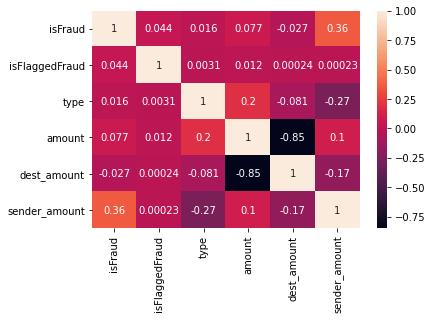

In [23]:
sns.heatmap(data.corr(),annot=True)

In [23]:
data = df[["isFraud","isFlaggedFraud","type","amount","sender_amount"]]

In [24]:
data

,isFraud,isFlaggedFraud,type,amount,sender_amount
0,0,0,1,9839.64,9839.64
1,0,0,1,1864.28,1864.28
2,1,0,3,181.00,181.00
3,1,0,0,181.00,181.00
4,0,0,1,11668.14,11668.14
...,...,...,...,...,...
6362615,1,0,0,339682.13,339682.13
6362616,1,0,3,6311409.28,6311409.28
6362617,1,0,0,6311409.28,6311409.28
6362618,1,0,3,850002.52,850002.52


### Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
y = data["isFraud"]
X= data[["isFlaggedFraud","type","amount","sender_amount"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [28]:
model = LogisticRegression(random_state=42)

In [29]:
model.fit(X_train,y_train)

LogisticRegression(random_state=42)

In [30]:
pred1 = model.predict(X_test)

In [31]:
from sklearn.metrics import recall_score,accuracy_score,f1_score,classification_report

In [32]:
accuracy_score(y_test,pred1)

0.9990989037010959

In [33]:
recall_score(y_test,pred1)

0.3212669683257919

In [34]:
f1_score(y_test,pred1)

0.47592931139549055

In [35]:
model.score(X_test,y_test)

0.9990989037010959

### Applying Some Standardization

In [36]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [37]:
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train) 

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [38]:
pipe.score(X_test,y_test)

0.9991460540888293

In [39]:
preds_2 = pipe.predict(X_test)

In [40]:
recall_score(y_test,preds_2)

0.41793500617030027

In [41]:
f1_score(y_test,preds_2)

0.5548880393227745

## Decision Tree Model

In [42]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(max_depth=6)
decision_tree.fit(X_train,y_train)
print("Accuracy of test:",decision_tree.score(X_test,y_test))

Accuracy of test: 0.9991895372241834


In [43]:
pred = decision_tree.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906355
           1       0.90      0.41      0.56      2431

    accuracy                           1.00   1908786
   macro avg       0.95      0.70      0.78   1908786
weighted avg       1.00      1.00      1.00   1908786



In [44]:
f1_score(y_test,pred)

0.5623762376237623

In [45]:
recall_score(y_test,pred)

0.4088852324146442

In [9]:
from sklearn.svm import SVC

In [10]:
svc = SVC(random_state=42)

In [ ]:
svc.fit(X_train,y_train)

In [ ]:
prediction = svc.predict(X_test)

In [ ]:
print(classification_report(y_test,prediction))